In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# 1. 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
df = pd.read_csv(URL+"data/LOC.csv") # 시각화를 위해 2차원 데이터 사용

In [ ]:
df.head(5)

,X1,X2,outlier
0,2.487304,1.816473,1
1,1.841548,1.678109,1
2,2.259622,1.309538,1
3,2.523444,1.771638,1
4,2.095712,1.925189,1


In [ ]:
print(df.shape)
print(" ")
print(df['outlier'].unique()) # 불량 유형 확인
print(" ")

print(df['outlier'].value_counts()) # 불량 타입별 수 확인 normalize=True 시, 비율로 반환
print(" ")
print(df['outlier'].value_counts(normalize=True))

(220, 3)
 
[ 1 -1]
 
 1    200
-1     20
Name: outlier, dtype: int64
 
 1    0.909091
-1    0.090909
Name: outlier, dtype: float64


In [ ]:
data_X = df.drop(["outlier"], axis = 1)
data_Y = df['outlier']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.pyplot import figure

# 모델 생성
# n_neighbors = K
# contamination = 0.? , Outlier의 비율을설정할 수 있음 (경험적으로 불량의 비율을 알고 있을때 설정)
clf = LocalOutlierFactor(n_neighbors=20,contamination = 0.1)
y_pred = clf.fit_predict(data_X) #1,-1로 나온다.
X_scores = clf.negative_outlier_factor_ # loc score 해당 함수에서는 negative로 반환

# 에러의 수를 확인하는 방법
n_errors = (y_pred != data_Y).sum()

print("LOC score 확인하기")
print(X_scores[:10])
print(" ")
print("에러의 수")
print(n_errors)

LOC score 확인하기
[-1.34087467 -1.11881847 -1.57395373 -1.4070746  -0.9662881  -1.5407627
 -0.9879168  -1.34225578 -1.04117993 -0.98330109]
 
에러의 수
8


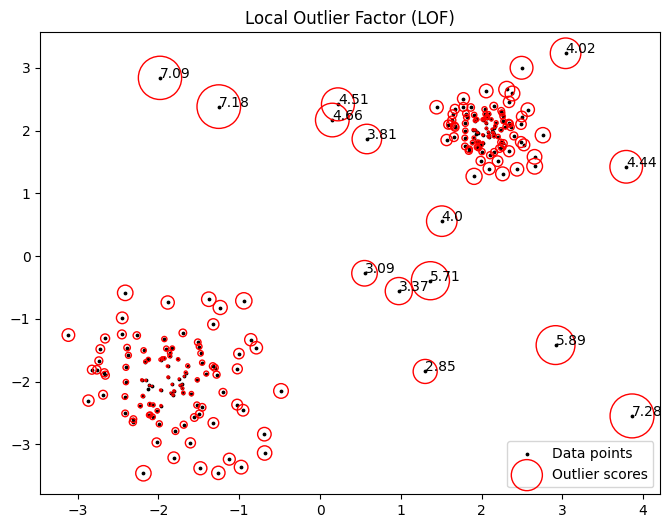

In [ ]:
# 시각화해서 보기 (고차원 데이터는 시각화가 어려움, tsne 등으로 축소해서 봐야함)
# figure 설정 방법
# figsize = (8,6)
# dpi = 해상도 - 발표 자료 등

figure(figsize=(8, 6), dpi=100)

data_X = np.array(data_X)
plt.title("Local Outlier Factor (LOF)")
# color = 점의 색
# s = 점의 size
# label
plt.scatter(data_X[:, 0], data_X[:, 1], color='black', s=3., label='Data points')

# minmax scaling으로 이상치를 표현하였음
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# scatter plot을 활용한 시각화
plt.scatter(data_X[:, 0], data_X[:, 1], s=1000 * radius, edgecolors='r',facecolors='none', label='Outlier scores')

#그림상의 특정 loc score(여기선 2.7) 이상의 값을 갖는 점들에 대해 score값을 보여주기 위함
n = np.copy(X_scores)
n[n>-2.7]=np.nan #양수기준, 2.7보다 작은 값 제거
n=-np.round(n,2) # 배열의 각 요소를 소수점 둘째 자리까지 반올림하여 양수로 전환

# print(n)
# print(data_X)
# Annotate
for i, txt in enumerate(n):  #i:인덱스, txt: 값
    if np.isnan(txt):continue #
    plt.annotate(txt, (data_X[i,0], data_X[i,1]))
legend = plt.legend(loc='lower right')
plt.show()